# Section 1. Data Exploration
In this section, we examine the structure, quality, and key patterns of the census dataset. The goal is to understand the types of variables present—such as categorical (object) and numeric. We also explore important demographic and employment-related variables, investigate their distributions, and address any missing values. This initial exploration lays the foundation for subsequent data preprocessing and model development for two objectives: (1) classification and (2) segmentation.

P.S.
Before excuting the code in the jupyter notebook, configure the conda environment according to the README file


### 1.1 Check all the columns and build the .csv data with header

In [2]:
## load the necessary package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/fy/rg_l8mrj7dl_ggqgdz22w7mc0000gn/T/ipykernel_3798/3172576731.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
### load the raw data given by client
col_file = "../data/raw/census-bureau.columns"
data_file = "../data/raw/census-bureau.data"

As shown below, the dataset contains 42 columns. Excluding the 'label' and 'weight' columns, all remaining columns represent features.

In [4]:
## check the column information
with open(col_file, "r") as f:
    columns = [line.strip() for line in f.readlines()]

print("Loaded column count in the 'census-bureau.columns':", len(columns))
print(columns)


Loaded column count in the 'census-bureau.columns': 42
['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', "fill inc questionnaire fo

In [6]:
## handle the missing values
df = pd.read_csv(data_file, header=None, names=columns)
# Replace '?' with actual missing values
df = df.replace("?", np.nan)
print("Data shape:", df.shape)
df.head()

Data shape: (199523, 42)


,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [7]:
## brief view of data type
df.dtypes

age                                             int64
class of worker                                object
detailed industry recode                        int64
detailed occupation recode                      int64
education                                      object
wage per hour                                   int64
enroll in edu inst last wk                     object
marital stat                                   object
major industry code                            object
major occupation code                          object
race                                           object
hispanic origin                                object
sex                                            object
member of a labor union                        object
reason for unemployment                        object
full or part time employment stat              object
capital gains                                   int64
capital losses                                  int64
dividends from stocks       

### 1.2 Check all percentage of each data types


#### Now let's build a bar plot to visualize the percentage and count of each data type out of a total of 42 columns.
As shown below, there are three data types:

**int64**: 12 out of 42 (28.6%), which includes variables like age, year, and weeks worked in year.

**float64**: 1 out of 42 (2.4%), which is weight.

**object**: 29 out of 42 (69.0%), which represents categorical variables such as class of worker, education, marital status, etc.

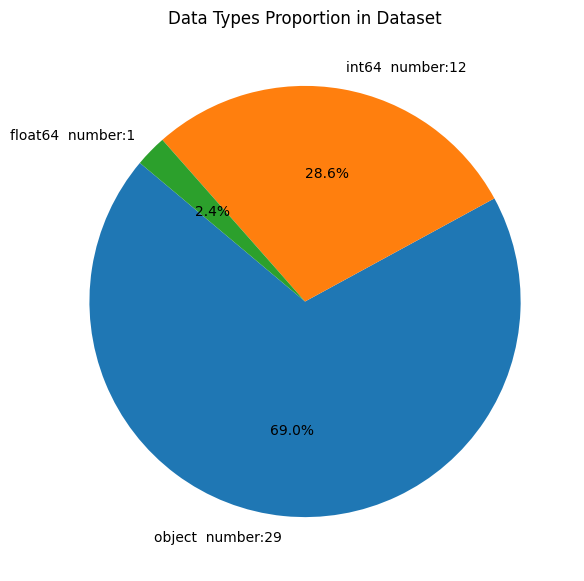

In [8]:
## build bar plot of the data type and get percentage and number
dtype_counts = df.dtypes.value_counts()
labels = [f"{dtype}  number:{count}" for dtype, count in zip(dtype_counts.index, dtype_counts.values)]

plt.figure(figsize=(7,7))
plt.pie(dtype_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140)
plt.title("Data Types Proportion in Dataset")
plt.show()


### 1.3 Data exploration of the features
Next, we examine the summary statistics for the numeric variables, including the mean, minimum, maximum, and the 25th, 50th (median), and 75th percentiles.


In [9]:
## get the brief discription of the numeric data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_summary = df[numeric_cols].describe().transpose()
print("Total number of columns of numeric data:", len(numeric_summary))
numeric_summary


Total number of columns of numeric data: 13


,count,mean,std,min,25%,50%,75%,max
age,199523.0,34.494199,22.310895,0.00,15.000,33.00,50.00,90.0
detailed industry recode,199523.0,15.352320,18.067129,0.00,0.000,0.00,33.00,51.0
detailed occupation recode,199523.0,11.306556,14.454204,0.00,0.000,0.00,26.00,46.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
own business or self employed,199523.0,0.175438,0.553694,0.00,0.000,0.00,0.00,2.0


In this part, we examine the category variables.

In [10]:
## get the brief discription of the category data
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_summary = df[categorical_cols].describe().transpose()
print("Total number of columns of numeric data:", len(categorical_summary))
categorical_summary


Total number of columns of numeric data: 29


,count,unique,top,freq
class of worker,199523,9,Not in universe,100245
education,199523,17,High school graduate,48407
enroll in edu inst last wk,199523,3,Not in universe,186943
marital stat,199523,7,Never married,86485
major industry code,199523,24,Not in universe or children,100684
major occupation code,199523,15,Not in universe,100684
race,199523,5,White,167365
hispanic origin,198649,9,All other,171907
sex,199523,2,Female,103984
member of a labor union,199523,3,Not in universe,180459


Here, we will calculate the weighted label distribution among all the populations. i.e. what is the percentage of people with income lower than $50,000 and higher than $50,000

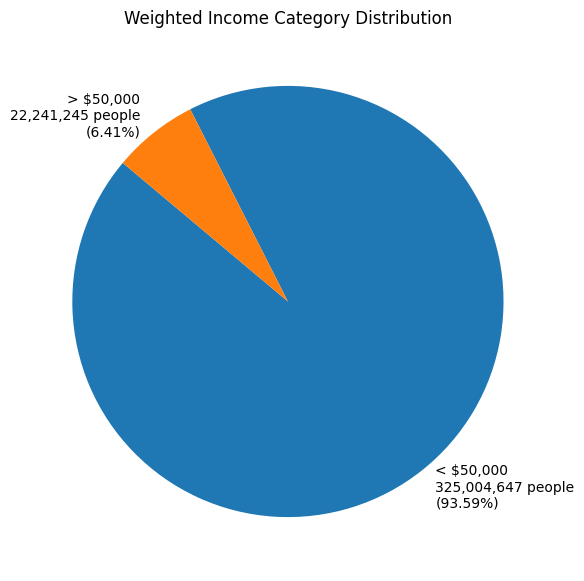

In [11]:
### Weighted Income Distribution Pie Chart

import matplotlib.pyplot as plt
import pandas as pd

# Load raw data
col_file = "../data/raw/census-bureau.columns"
data_file = "../data/raw/census-bureau.data"

with open(col_file, "r") as f:
    columns = [line.strip() for line in f.readlines()]

df = pd.read_csv(data_file, header=None, names=columns)
df = df.replace("?", np.nan)

# Make sure weight is numeric
df["weight"] = pd.to_numeric(df["weight"], errors="coerce")

# Convert label to binary 0/1
df["label"] = df["label"].apply(lambda x: 1 if str(x).strip() == "50000+." else 0)


# WEIGHTED income counts
weighted_counts = df.groupby("label")["weight"].sum()

# Display order: label=0 first, label=1 second
values = [weighted_counts[0], weighted_counts[1]]
labels_new = ["< $50,000", "> $50,000"]
proportions = [v / sum(values) * 100 for v in values]

pie_labels = [
    f"{lbl}\n{val:,.0f} people\n({prop:.2f}%)"
    for lbl, val, prop in zip(labels_new, values, proportions)
]


# Plot
plt.figure(figsize=(7,7))
plt.pie(values, labels=pie_labels, startangle=140)
plt.title("Weighted Income Category Distribution")
plt.show()


Let's check the weighted age distribution among all the people

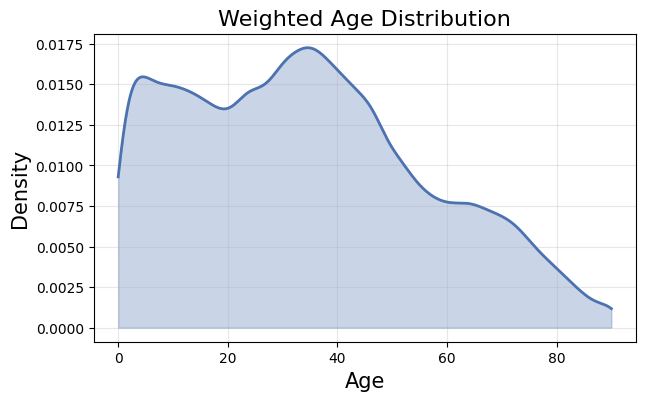

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Age data
ages = df["age"].astype(float).values
weights = df["weight"].astype(float).values

# Weighted KDE
weighted_kde = gaussian_kde(ages, weights=weights)

# Create smooth range for the kde
age_grid = np.linspace(ages.min(), ages.max(), 500)

# Plot
plt.figure(figsize=(7,4))
plt.plot(age_grid, weighted_kde(age_grid), color="#4C72B0", linewidth=2)
plt.fill_between(age_grid, weighted_kde(age_grid), alpha=0.3, color="#4C72B0")

plt.title("Weighted Age Distribution", fontsize=16)
plt.xlabel("Age", size=15)
plt.ylabel("Density", size=15)
plt.grid(alpha=0.3)
plt.show()



Here let's check the class of worker type percentage

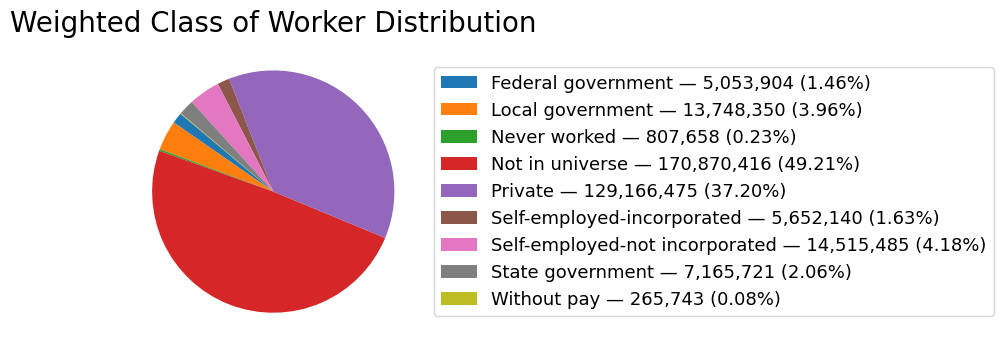

In [13]:
import matplotlib.pyplot as plt


# Weighted counts
weighted_counts = df.groupby("class of worker")["weight"].sum()

labels = weighted_counts.index
counts = weighted_counts.values
proportions = counts / counts.sum() * 100


# Plot
plt.figure(figsize=(9,9))
wedges, _ = plt.pie(counts, startangle=140)

plt.legend(
    wedges,
    [f"{lbl} — {cnt:,.0f} ({prop:.2f}%)"
     for lbl, cnt, prop in zip(labels, counts, proportions)],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=13
)

plt.title("Weighted Class of Worker Distribution", fontsize=20)
plt.tight_layout()
plt.show()



Below we are checking the educational level distribution in the bar plot

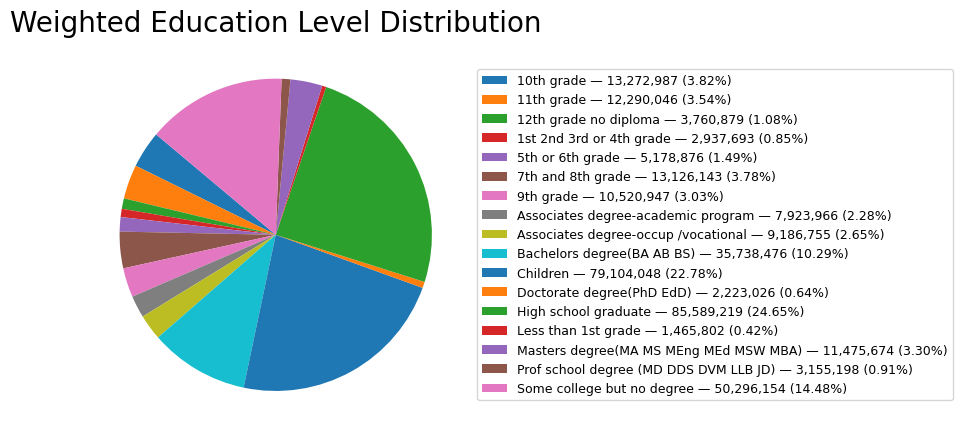

In [14]:
import matplotlib.pyplot as plt

# Weighted counts
weighted_counts = df.groupby("education")["weight"].sum()

labels = weighted_counts.index
counts = weighted_counts.values
proportions = counts / counts.sum() * 100


# Plot
plt.figure(figsize=(9,9))
wedges, _ = plt.pie(counts, startangle=140)

plt.legend(
    wedges,
    [f"{lbl} — {cnt:,.0f} ({prop:.2f}%)"
     for lbl, cnt, prop in zip(labels, counts, proportions)],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title("Weighted Education Level Distribution", fontsize=20)
plt.tight_layout()
plt.show()

In [64]:
## save the raw data as .csv format, already replace the missing value ? to NaN
df.to_csv("../data/preprocessed/cleaned_raw.csv", index=False)